In [1]:
import numpy as np
import matplotlib.pyplot as plt
from extrema_detection import find_potential_extrema, pwct, find_corrected_extrema
from onset_offset_detection import find_onsets, find_offsets
from metrics import (find_interbreath_interval,
    find_breathing_rate,
    find_volumes,
    find_tidal_volume,
    find_minute_ventilation,
    find_duty_cycle,
    find_coef_var_breathing_rate,
    find_coef_var_breath_volumes,
    find_coef_var_duty_cycle,
    )

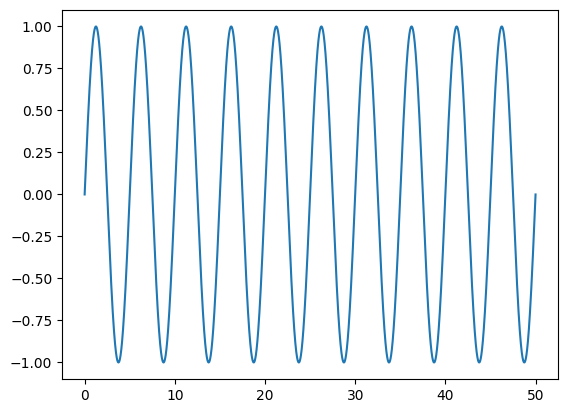

In [2]:
duration = 50
fs = 200
f = 0.2
x = np.linspace(0, duration, fs*duration)
y = np.sin(2*np.pi*f*x)
_ = plt.plot(x, y)

In [3]:
peaks, troughs = find_potential_extrema(y, fs)

In [4]:
peaks_idx, troughs_idx = pwct(peaks, troughs)

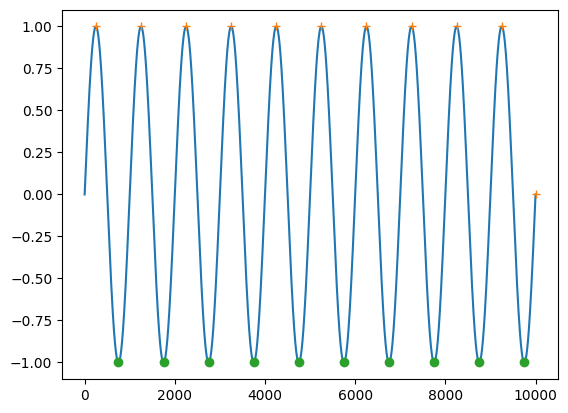

In [5]:
_ = plt.plot(y)
_ = plt.plot(peaks_idx, y[peaks_idx], '+')
_ = plt.plot(troughs_idx, y[troughs_idx], 'o')

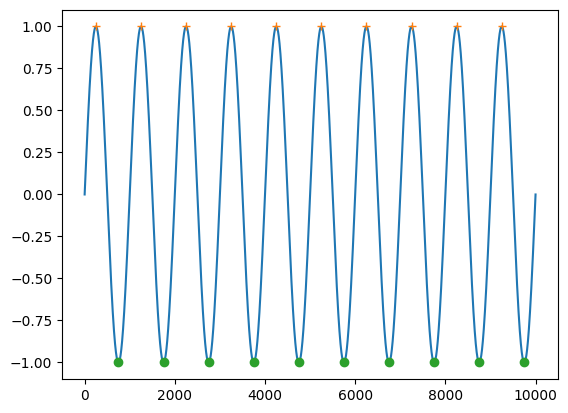

In [6]:
corrected_peaks, corrected_troughs = find_corrected_extrema(y, peaks_idx, troughs_idx)

_ = plt.plot(y)
_ = plt.plot(corrected_peaks, y[corrected_peaks], '+')
_ = plt.plot(corrected_troughs, y[corrected_troughs], 'o')

In [7]:
inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets = \
    find_onsets(y, np.array(corrected_peaks), np.array(corrected_troughs))

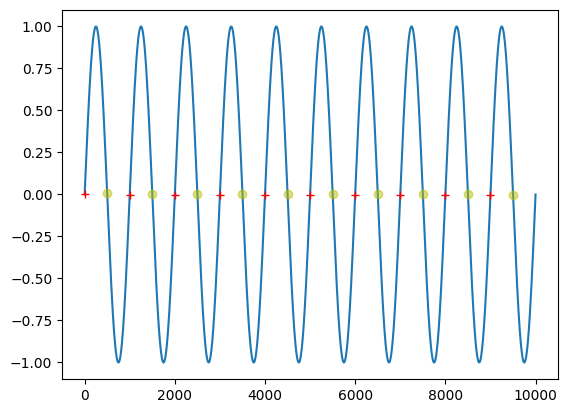

In [8]:
_ = plt.plot(y)
_ = plt.plot(inhale_onsets, y[inhale_onsets], 'r+')
_ = plt.plot(exhale_onsets, y[exhale_onsets], 'yo', alpha = .5)

In [9]:
inhale_onsets

array([   0,  999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999])

In [10]:
samples_between_inhale_onsets = [inhale_onsets[i + 1] - inhale_onsets[i] for i in range(len(inhale_onsets) - 1)]
(np.array(samples_between_inhale_onsets) / fs).mean()

4.999444444444445

In [11]:
interbreath_interval = find_interbreath_interval(fs, inhale_onsets)
interbreath_interval

4.999444444444445

In [12]:
breathing_rate = find_breathing_rate(fs, inhale_onsets)
breathing_rate

0.20002222469163236

In [13]:
find_coef_var_breathing_rate(fs, inhale_onsets)

0.0003143046032610434

In [14]:
1 / breathing_rate

4.999444444444445

In [15]:
inhale_offsets, exhale_offsets = find_offsets(y, inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets)

In [16]:
inhale_volumes, exhale_volumes = find_volumes(y, fs, inhale_onsets, inhale_offsets, exhale_onsets, exhale_offsets )

In [17]:
inhale_volumes

array([1591.35593773, 1591.39002722, 1591.39206946, 1591.39348333,
       1591.39426881, 1591.39442591, 1591.39395462, 1591.39285496,
       1591.39112691, 1591.39034143])

In [18]:
find_coef_var_breath_volumes(inhale_volumes)

6.958875199733499e-06

In [19]:
tidal_volume = find_tidal_volume(inhale_volumes, exhale_volumes)
tidal_volume

3182.7811803323993

In [20]:
find_minute_ventilation(breathing_rate, tidal_volume)

38197.61834380477

In [21]:
find_duty_cycle(fs, inhale_onsets, inhale_offsets, interbreath_interval)

0.4990554506056228

In [21]:
find_coef_var_duty_cycle(fs, inhale_onsets, inhale_offsets)

0.0008962196302604367

In [11]:
exhale_offsets

array([ 998., 1998., 2998., 3998., 4998., 5998., 6998., 7998., 8998.,
         nan])

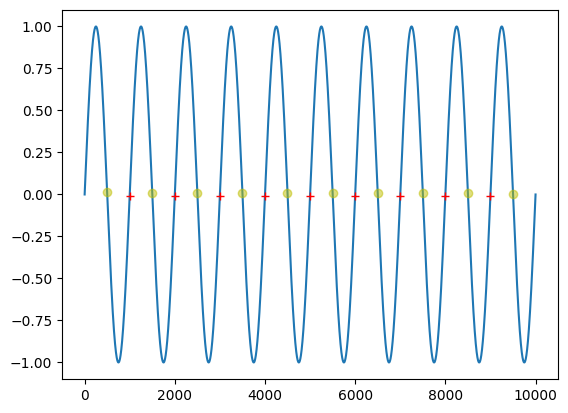

In [12]:
_ = plt.plot(y)
_ = plt.plot(inhale_offsets, y[inhale_offsets.astype(int)], 'yo', alpha = .5)
_ = plt.plot(exhale_offsets[:-1], y[exhale_offsets[:-1].astype(int)], 'r+')

In [13]:
def plot_corrected_vs_potential(signal, 
        potential_peaks, potential_troughs, \
        corrected_peaks, corrected_troughs):
    _ = plt.plot(signal, 'k', alpha = .1, label = 'signal')
    _ = plt.scatter(corrected_peaks, signal[corrected_peaks], marker=8, c='y', label='corrected peaks')
    _ = plt.scatter(corrected_troughs, signal[corrected_troughs], marker=10, c='y', label='corrected troughs')
    _ = plt.scatter(potential_peaks, signal[potential_peaks], marker=9, c='r', label='potential peaks')
    _ = plt.scatter(potential_troughs, signal[potential_troughs], marker=11, c='r', label='potential troughs')
    _ = plt.legend()

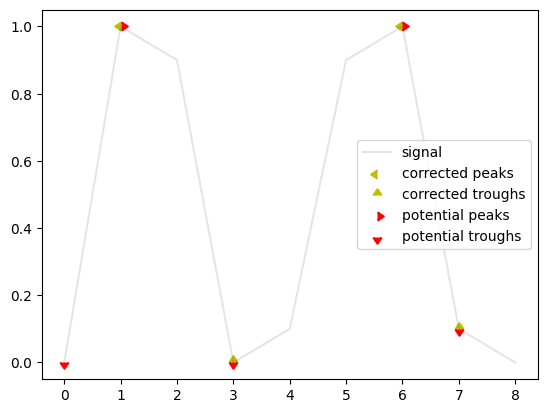

In [14]:
start_with_peak = np.array([0, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [1, 6]
potential_troughs = [0, 3, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

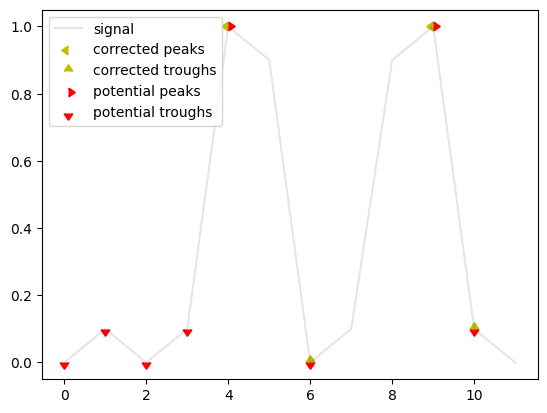

In [15]:
start_with_peak = np.array([0,.1, 0, .1, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [4, 9]
potential_troughs = [0, 1, 2, 3, 6, 10]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

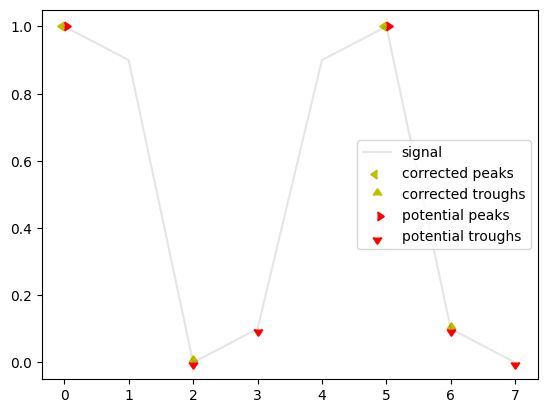

In [16]:
remove_trough = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 5]
potential_troughs = [2, 3, 6, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

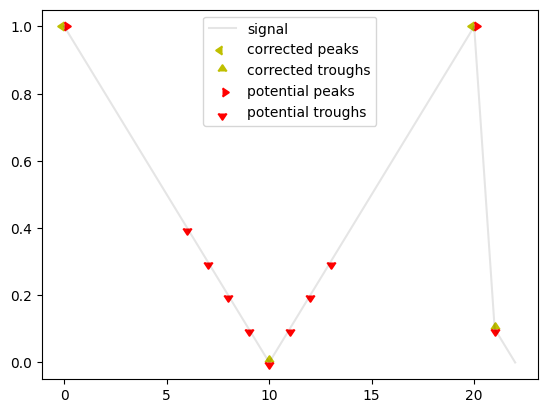

In [17]:
remove_trough = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 20]
potential_troughs = [6, 7, 8, 9, 10, 11, 12, 13, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

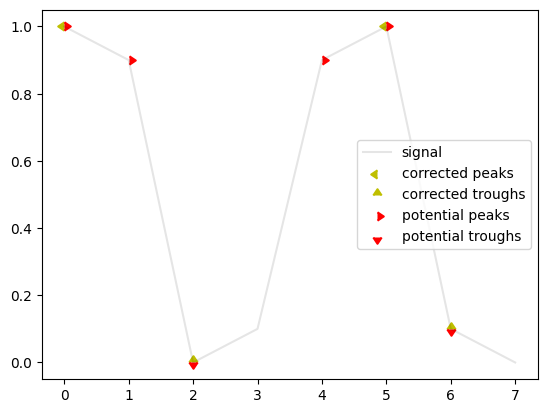

In [18]:
remove_peak = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 1, 4, 5]
potential_troughs = [2, 6]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

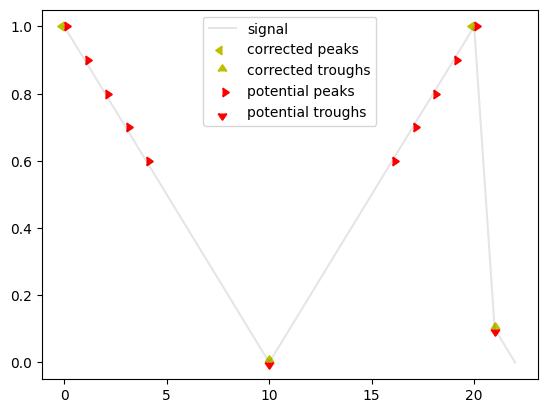

In [19]:
remove_peaks = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 1, 2, 3, 4, 16, 17, 18, 19, 20]
potential_troughs = [10, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peaks, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peaks, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

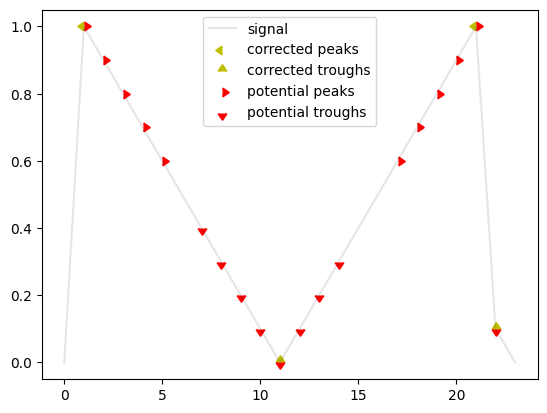

In [20]:
remove_everything = np.array([0, 1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [1,  2,  3,  4,  5, 17, 18, 19, 20, 21]
potential_troughs = [7,  8,  9, 10, 11, 12, 13, 14, 22]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_everything, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_everything, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

In [32]:
!python -m unittest

.........0.2715519876924509
......
----------------------------------------------------------------------
Ran 15 tests in 0.003s

OK


In [16]:
#!pip install --upgrade numpy==1.21.6

In [17]:
#!pipreqs . --force

In [14]:
!pip install pylint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 9.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 10.0 MB/s eta 0:00:00
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00


In [17]:
!pip install 'pylint[spelling]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.7 MB/s eta 0:00:00


In [18]:
!pylint ./extrema_detection/_findExtrema.py

************* Module extrema_detection._findExtrema
extrema_detection/_findExtrema.py:11:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:29:25: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:34:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:36:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:40:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:46:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:56:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:61:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:62:0: C0301: Line too long (111/100) (line-too-long)
extrema_detection/_findExtrema.py:83:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:87:0: C0303: Trailing whi

In [24]:
!black .

reformatted /Users/rima/Desktop/breathmetrics-Python/extrema_detection/__init__.py
reformatted /Users/rima/Desktop/breathmetrics-Python/onset_offset_detection/__init__.py
reformatted /Users/rima/Desktop/breathmetrics-Python/extrema_detection/_findExtrema.py
reformatted /Users/rima/Desktop/breathmetrics-Python/tests/test_findCorrectExtrema.py
reformatted /Users/rima/Desktop/breathmetrics-Python/onset_offset_detection/_findOnsetOffset.py
reformatted /Users/rima/Desktop/breathmetrics-Python/demo.ipynb

All done! ✨ 🍰 ✨
6 files reformatted, 1 file left unchanged.


In [25]:
!pylint .

************* Module .
__init__.py:1:0: F0010: error while code parsing: Unable to load file __init__.py:
[Errno 2] No such file or directory: '__init__.py' (parse-error)


In [26]:
pip install pre-commit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Using cached PyYAML-6.0-cp38-cp38-macosx_10_9_x86_64.whl (192 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
